# Introduction

The GraphBLAS is an API for sparse matrix and vector operations.  This notebook acts as an introduction to the GraphBLAS and also tutorial on how work with graphs in Python using the pygraphblas library.

In [6]:
from pygraphblas import Matrix, Vector, min_plus
from pygraphblas.binaryop import min_int64, Accum
from pygraphblas.descriptor import ooco
from pygraphblas.demo.gviz import draw_graph, draw_layers, graph_op
from IPython.core.debugger import set_trace

Matrices can be created several different ways, for example literal lists of data can be used to construct them, as shown here:

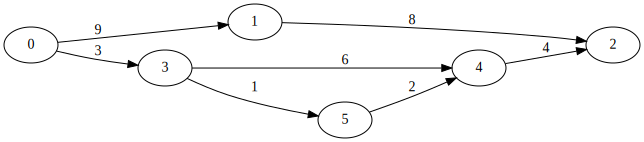

In [7]:
m = Matrix.from_lists(
    [0, 0, 1, 3, 3, 4, 5],
    [1, 3, 2, 4, 5, 2, 4],
    [9, 3, 8, 6, 1, 4, 2],)

draw_graph(m)

The graph above shows how the nodes and edges are connected.  Traversing a graph using matrix multiplication.

This function shows how matrix multiplication can be used to a bfs search.  The graph shows the distance in hops from the source to every node as a label on the node.

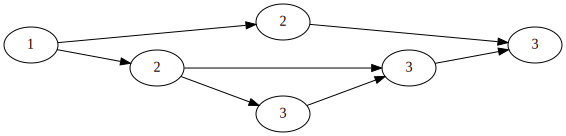

In [8]:

def bfs(matrix, start):
    v = Vector.from_type(int, matrix.nrows)
    q = Vector.from_type(bool, matrix.nrows)
    q[start] = True
    not_done = True
    level = 1
    
    while not_done and level <= matrix.nrows:
        v[:,q] = level
        q = v.vxm(matrix, mask=v, desc=ooco)
        not_done = q.reduce_bool()
        level += 1
    return v
    
draw_graph(m, show_weight=False, label_vector=bfs(m, 0))

Another common algorithm is to find the mini

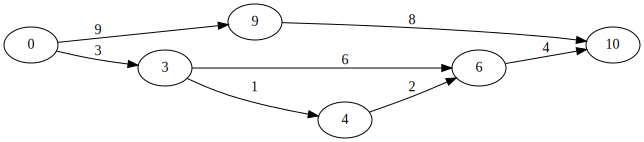

In [9]:
def shortest_path_length(matrix, start):
    v = Vector.from_type(matrix.gb_type, matrix.nrows)
    v[start] = 0

    with min_plus, Accum(min_int64):
        for _ in range(matrix.nrows):
            w = Vector.dup(v)
            v @= matrix
            if w.iseq(v):
                break
        return v

draw_graph(m, label_vector=shortest_path_length(m, 0))

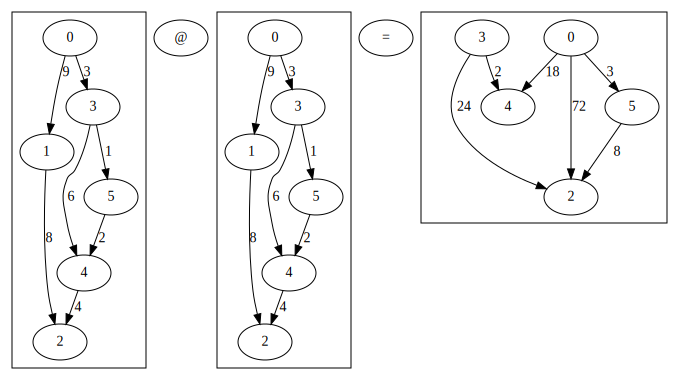

In [10]:
graph_op(m, '@', m, m@m)

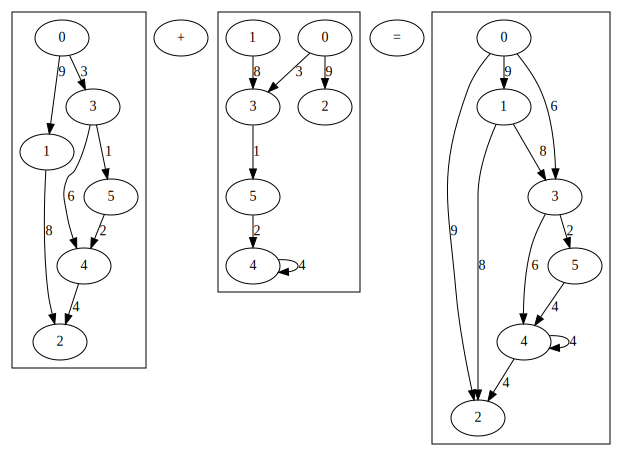

In [11]:
n = Matrix.from_lists(
    [0, 0, 1, 3, 3, 4, 5],
    [2, 3, 3, 5, 5, 4, 4],
    [9, 3, 8, 6, 1, 4, 2],)

graph_op(m, '+', n, m + n)

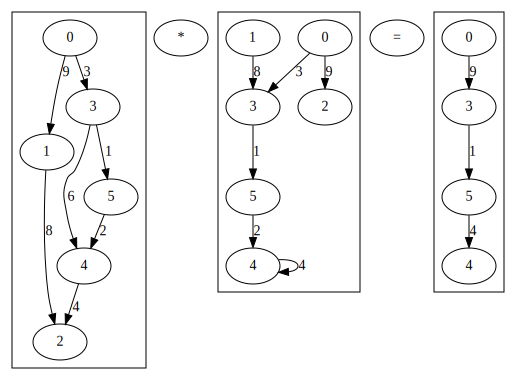

In [12]:
graph_op(m, '*', n, m * n)